HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#reading the dataset

In [3]:
df=pd.read_csv("HR_attrition.csv")

In [4]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# EDA

In [5]:
df.shape

(1470, 35)

There are 1470 rows and 35 columns in the data

In [6]:
#finding the datatypes of each column
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
#knowing the columns of the data
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are int64 type of data 26 columns present and 9 object type of data present in the data

In [9]:
#checking the missing data
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values present in the data

<AxesSubplot:>

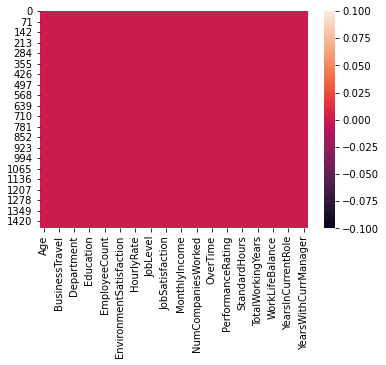

In [10]:
sns.heatmap(df.isnull())

 There is no missing data present in the data

In [11]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The describe() method shows statistical information of the dataset.The count of the dataset,min and max values of each column and mean and standard deviation and quartiles of the dataset

In [12]:
#checking number of unique values in the each column
count=1
for i in df:
    print(f'{count}.{i}.{df[i].nunique()}')
    print(f'{df[i].value_counts()}',end='\n----------\n\n')
    count+=1


1.Age.43
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
----------

2.Attrition.2
No     1233
Yes     237
Name: Attrition, dtype: int64
----------

3.BusinessTravel.3
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
----------

4.DailyRate.886
691     6
1082    5
408     5
329     5
530     5
       ..
708     1
713     1
717     1
719     1
1499    1
Name: DailyRate, Length: 886, dtype: int64
----------

5.Department.3
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
----------

6.DistanceFromH

There is imbalance in the data (in y-variable one of the class have very high number than the other)
EmployeeCount,Over18 and Standardhours are constant variable(All the values in the columns are same) and needed to be dropped
Employee number is a unique variable ( All the values in the columns are completely different/primary key) and needed to be dropped

<AxesSubplot:xlabel='Attrition', ylabel='count'>

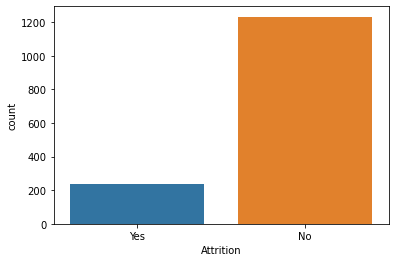

In [13]:
sns.countplot(df['Attrition'])

In [14]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Total 1233 meember are are saying No and 237 members are saying Yes,we will treat this as an imbaalnce data ,we can handle it later

In [15]:
#dropping unnecessary columns
df.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'],axis=1,inplace=True)

In [16]:
#Seperating Categeorical column/numerical columns
data=df.select_dtypes(exclude=['object'])
data

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


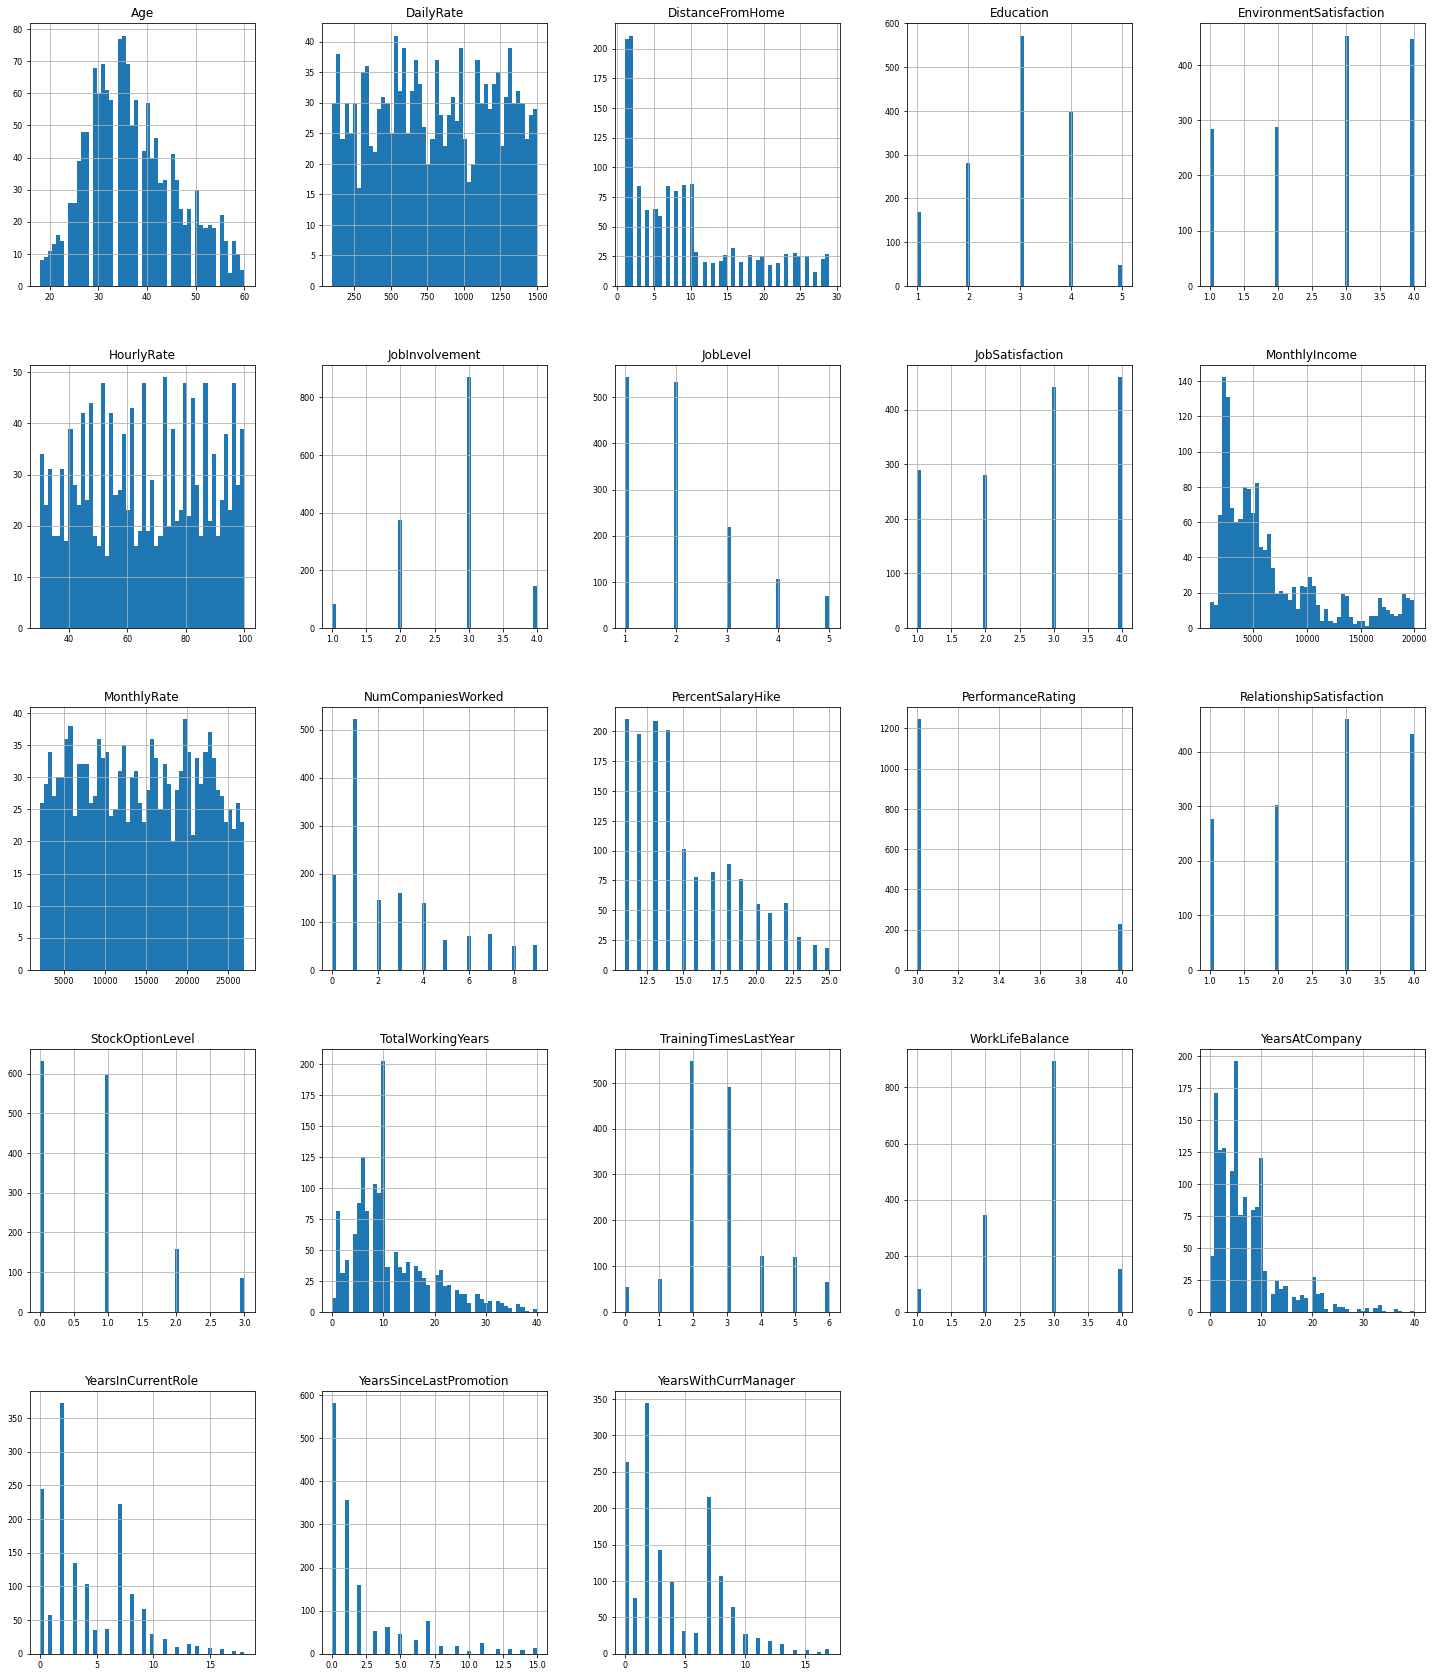

In [17]:
data.hist(figsize=(25,30),bins=50,xlabelsize=8,ylabelsize=8)
plt.show()

TrainingTimesLastYear,Age,Education, is normally distributed,and the other columns are right skewed

Barplot

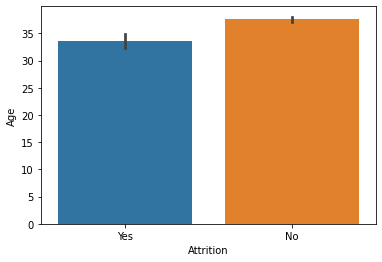

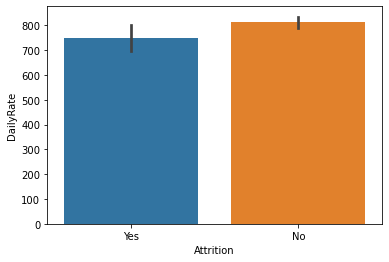

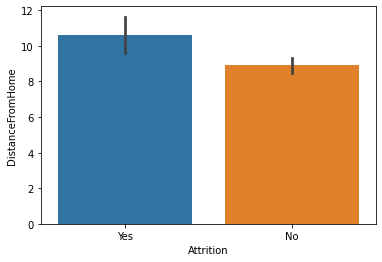

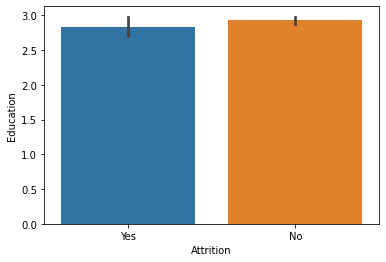

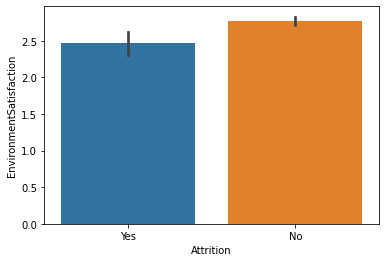

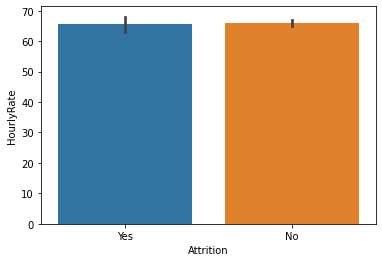

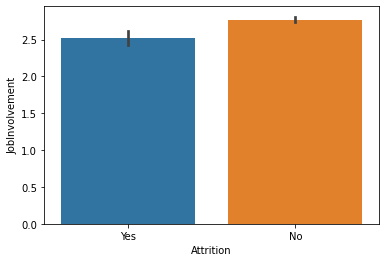

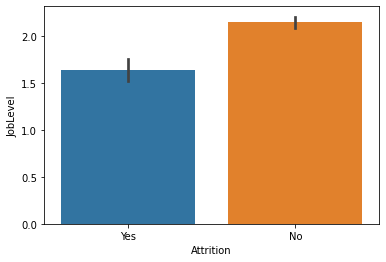

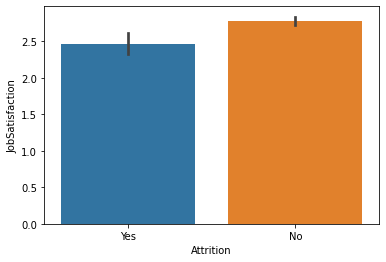

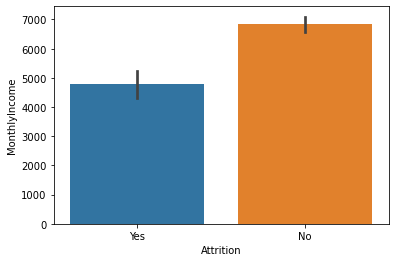

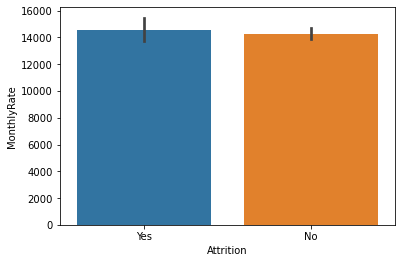

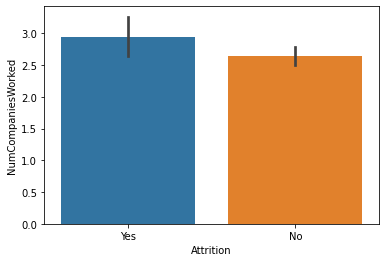

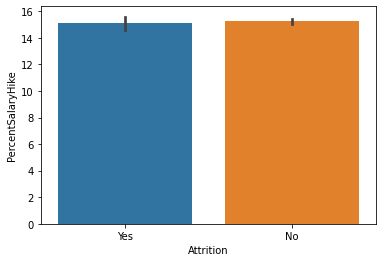

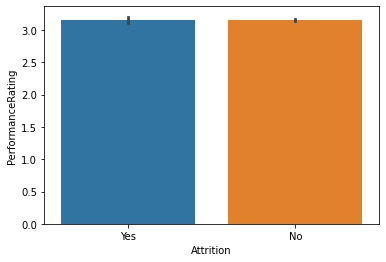

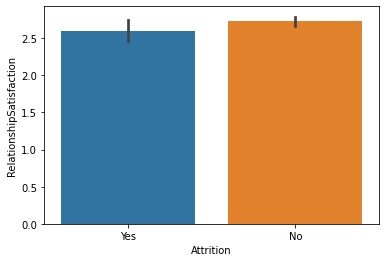

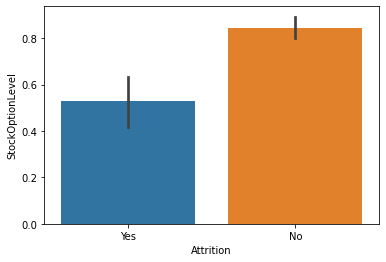

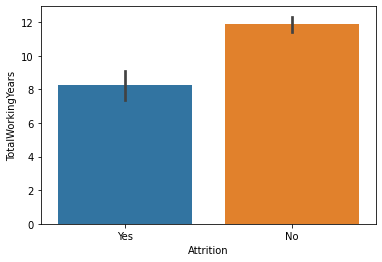

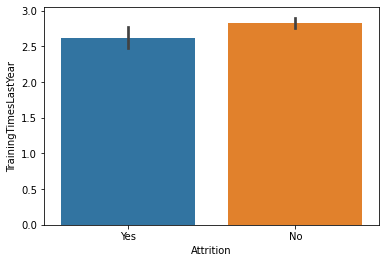

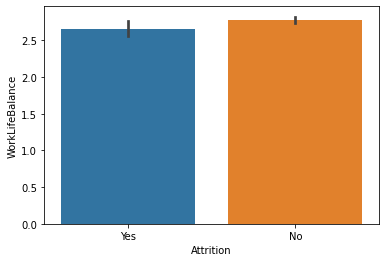

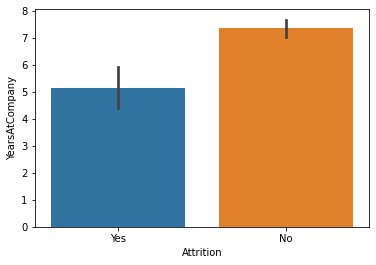

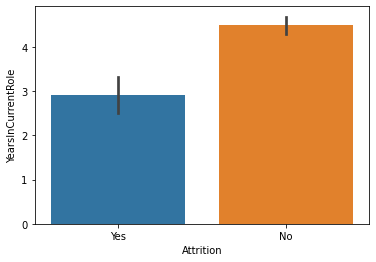

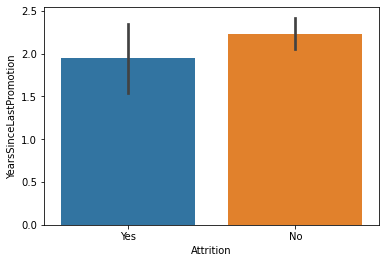

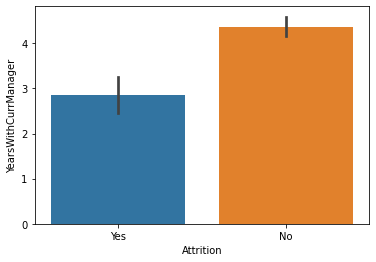

In [18]:
for i in data.columns:
    sns.barplot(x=df['Attrition'],y=data[i])
    plt.show()

# Checking for Outliers

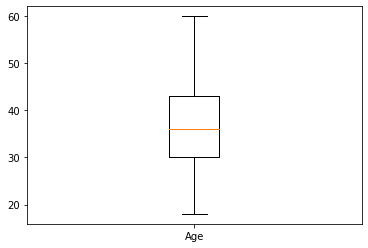

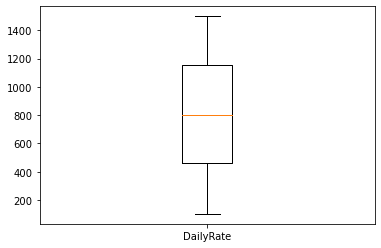

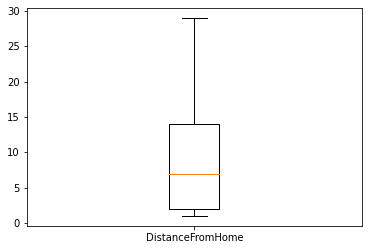

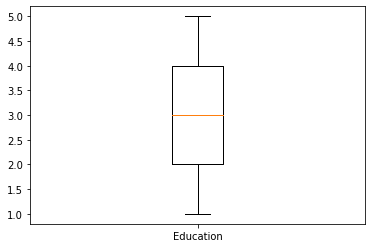

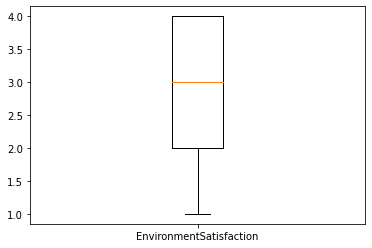

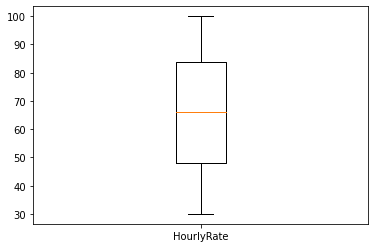

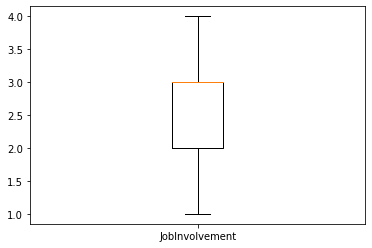

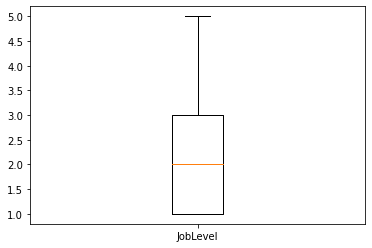

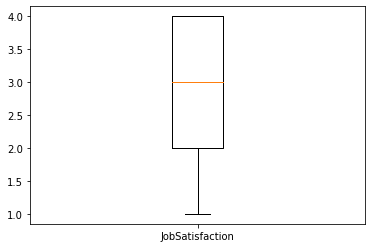

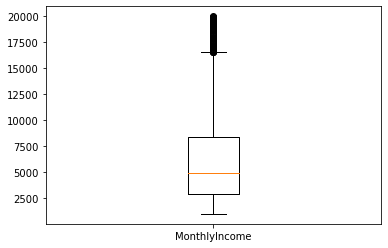

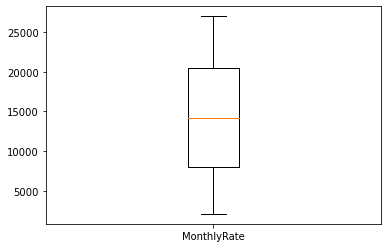

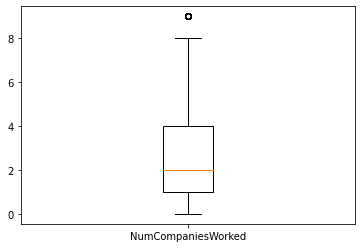

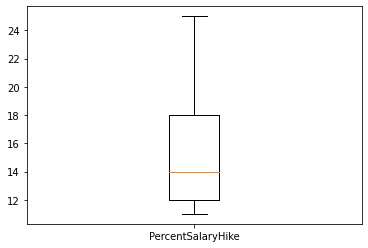

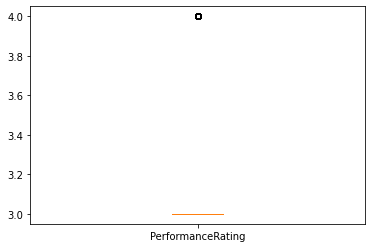

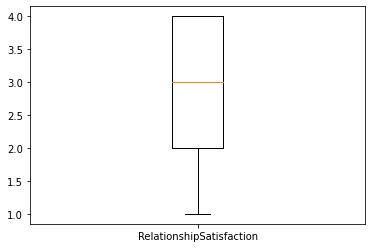

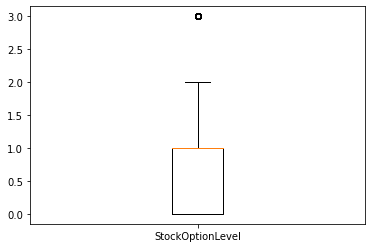

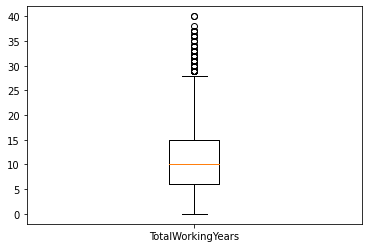

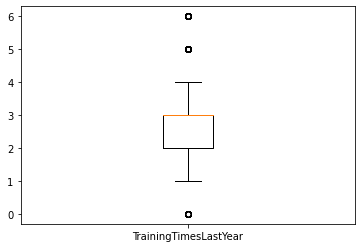

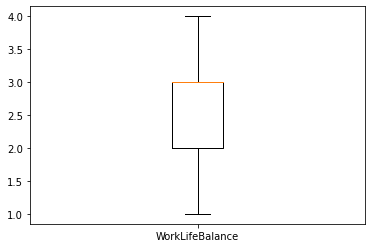

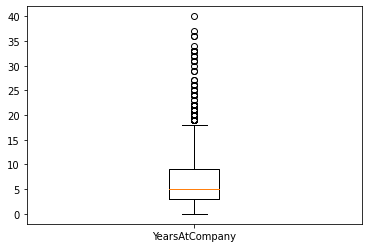

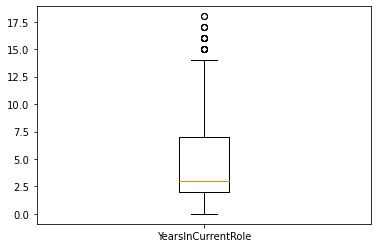

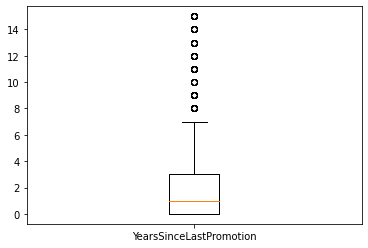

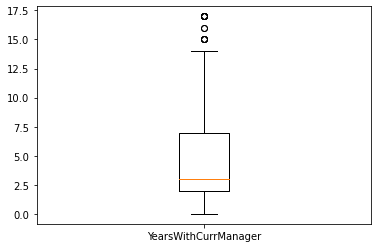

In [19]:
for i in data.columns:
    plt.boxplot(data[i],labels=[i])
    plt.show()


MonthlyIncome,Numcpmpaniesworked,stockoptionlevel,TotalWorkingYears,TrainingTimesLastyear,YearsAtCompany,Years in CurrentRole,YearsinceLastPromotion,yearsWithCurrManager have outliers, we have to remove those outliers

# Checking the correlation

In [20]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<AxesSubplot:>

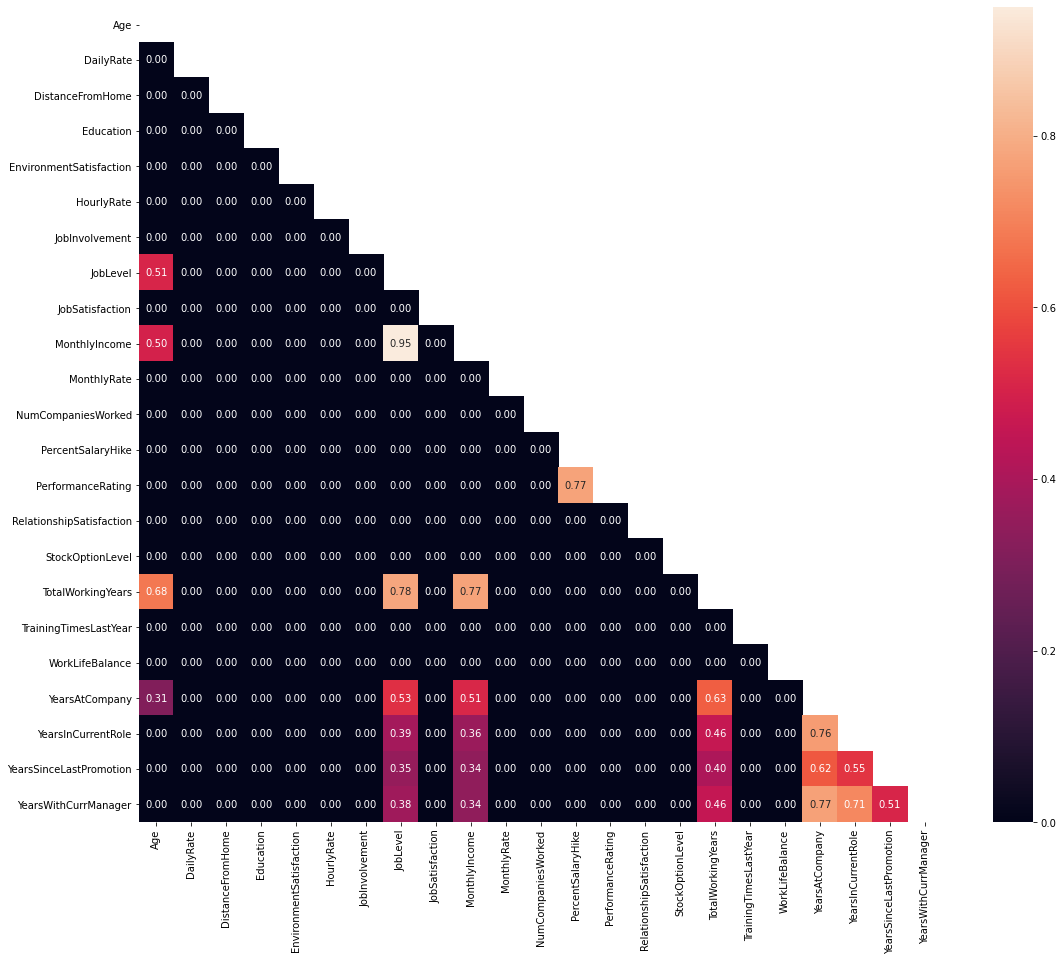

In [21]:
#finding the correlation
corr=data.corr()

plt.figure(figsize=(18,15))
 
#argument triiming out the values above the main diagonal
mask=np.triu(corr)

#setting low correlation value to 0
corr[(corr.values<0.3)&(corr.values>-0.3)]=0

#plotting the heatmap
sns.heatmap(corr,annot=True,fmt='.2f',mask=mask)

There is multicollinearity exist in the data 

Extracting categeorical features

In [22]:
cat_var=df.select_dtypes(include=['object'])
cat_var

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


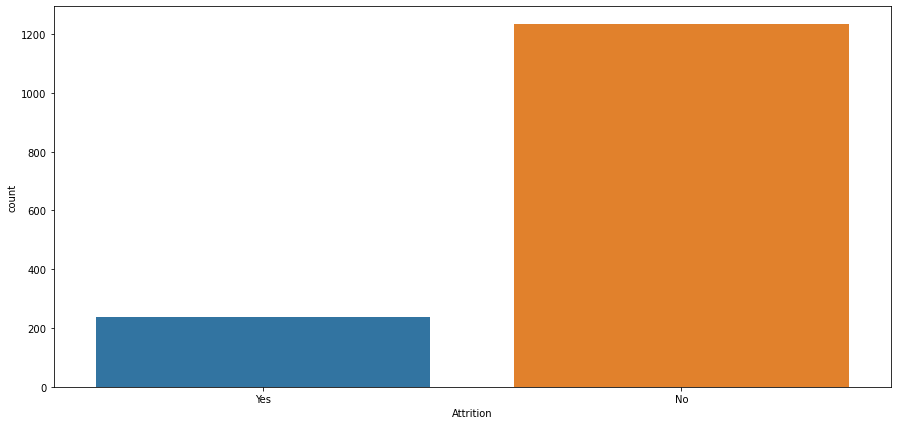

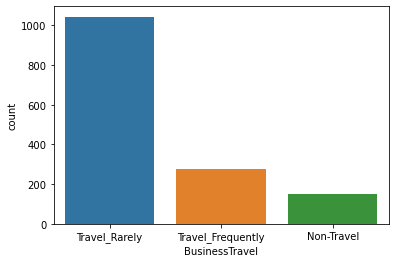

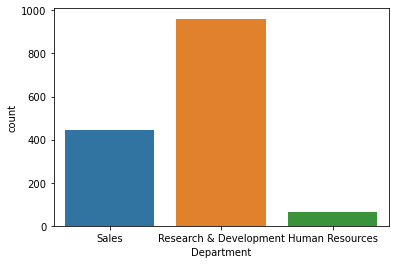

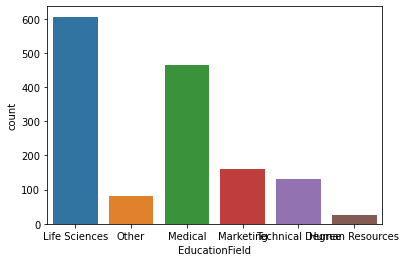

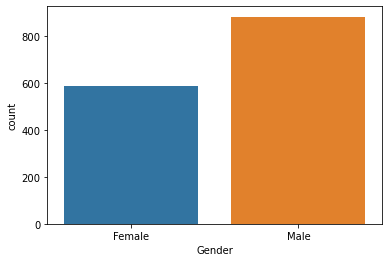

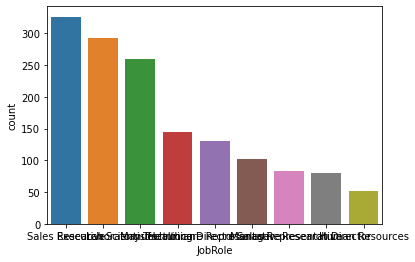

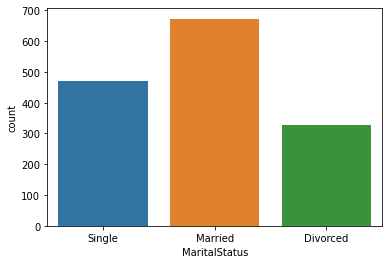

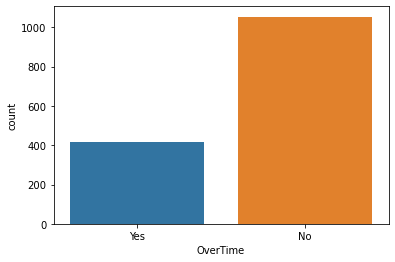

In [23]:
#plotting the categeorical variables
plt.figure(figsize=(15,7))
for i in cat_var:
    sns.countplot(x=cat_var[i])
    plt.show()

In [24]:
#count values of cat_var
for i in cat_var:
    print(cat_var[i].value_counts(),end="\n---------\n\n")

No     1233
Yes     237
Name: Attrition, dtype: int64
---------

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
---------

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
---------

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
---------

Male      882
Female    588
Name: Gender, dtype: int64
---------

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
---------

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
-----

# Transforming categeorical data 
creating dummies for categeorical variable

In [25]:
cat_data=cat_var.copy()
cat_data

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [26]:
cat_data=pd.get_dummies(cat_data,drop_first=True)
cat_data

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,0,1,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1466,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1467,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1468,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


<AxesSubplot:>

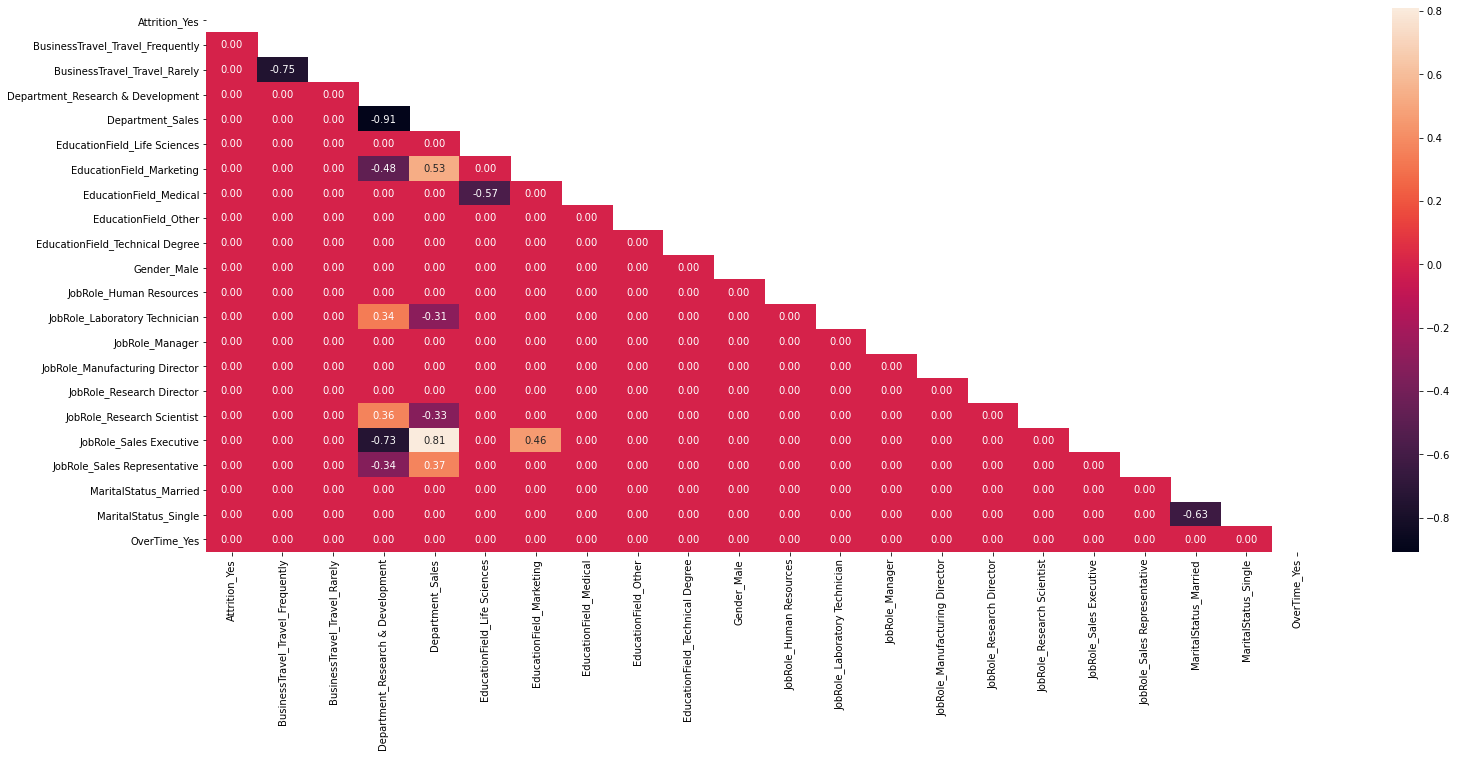

In [27]:
#coorelation for categeorical data
corr=cat_data.corr()

plt.figure(figsize=(25,10))

#Argument trimming out the values above the diagonal
mask=np.triu(corr)

#setting low correlation value to 0
corr[(corr.values<0.3) & (corr.values>-0.3)]=0
     
#plotting the heatmap
sns.heatmap(corr,annot=True,fmt='.2f',mask=mask)

In [28]:
#conatinating numerical and categeroical data
final_data=pd.concat([data,cat_data],axis=1)

In [29]:
final_data.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0


In [30]:
final_data['Attrition_Yes']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition_Yes, Length: 1470, dtype: uint8

<AxesSubplot:>

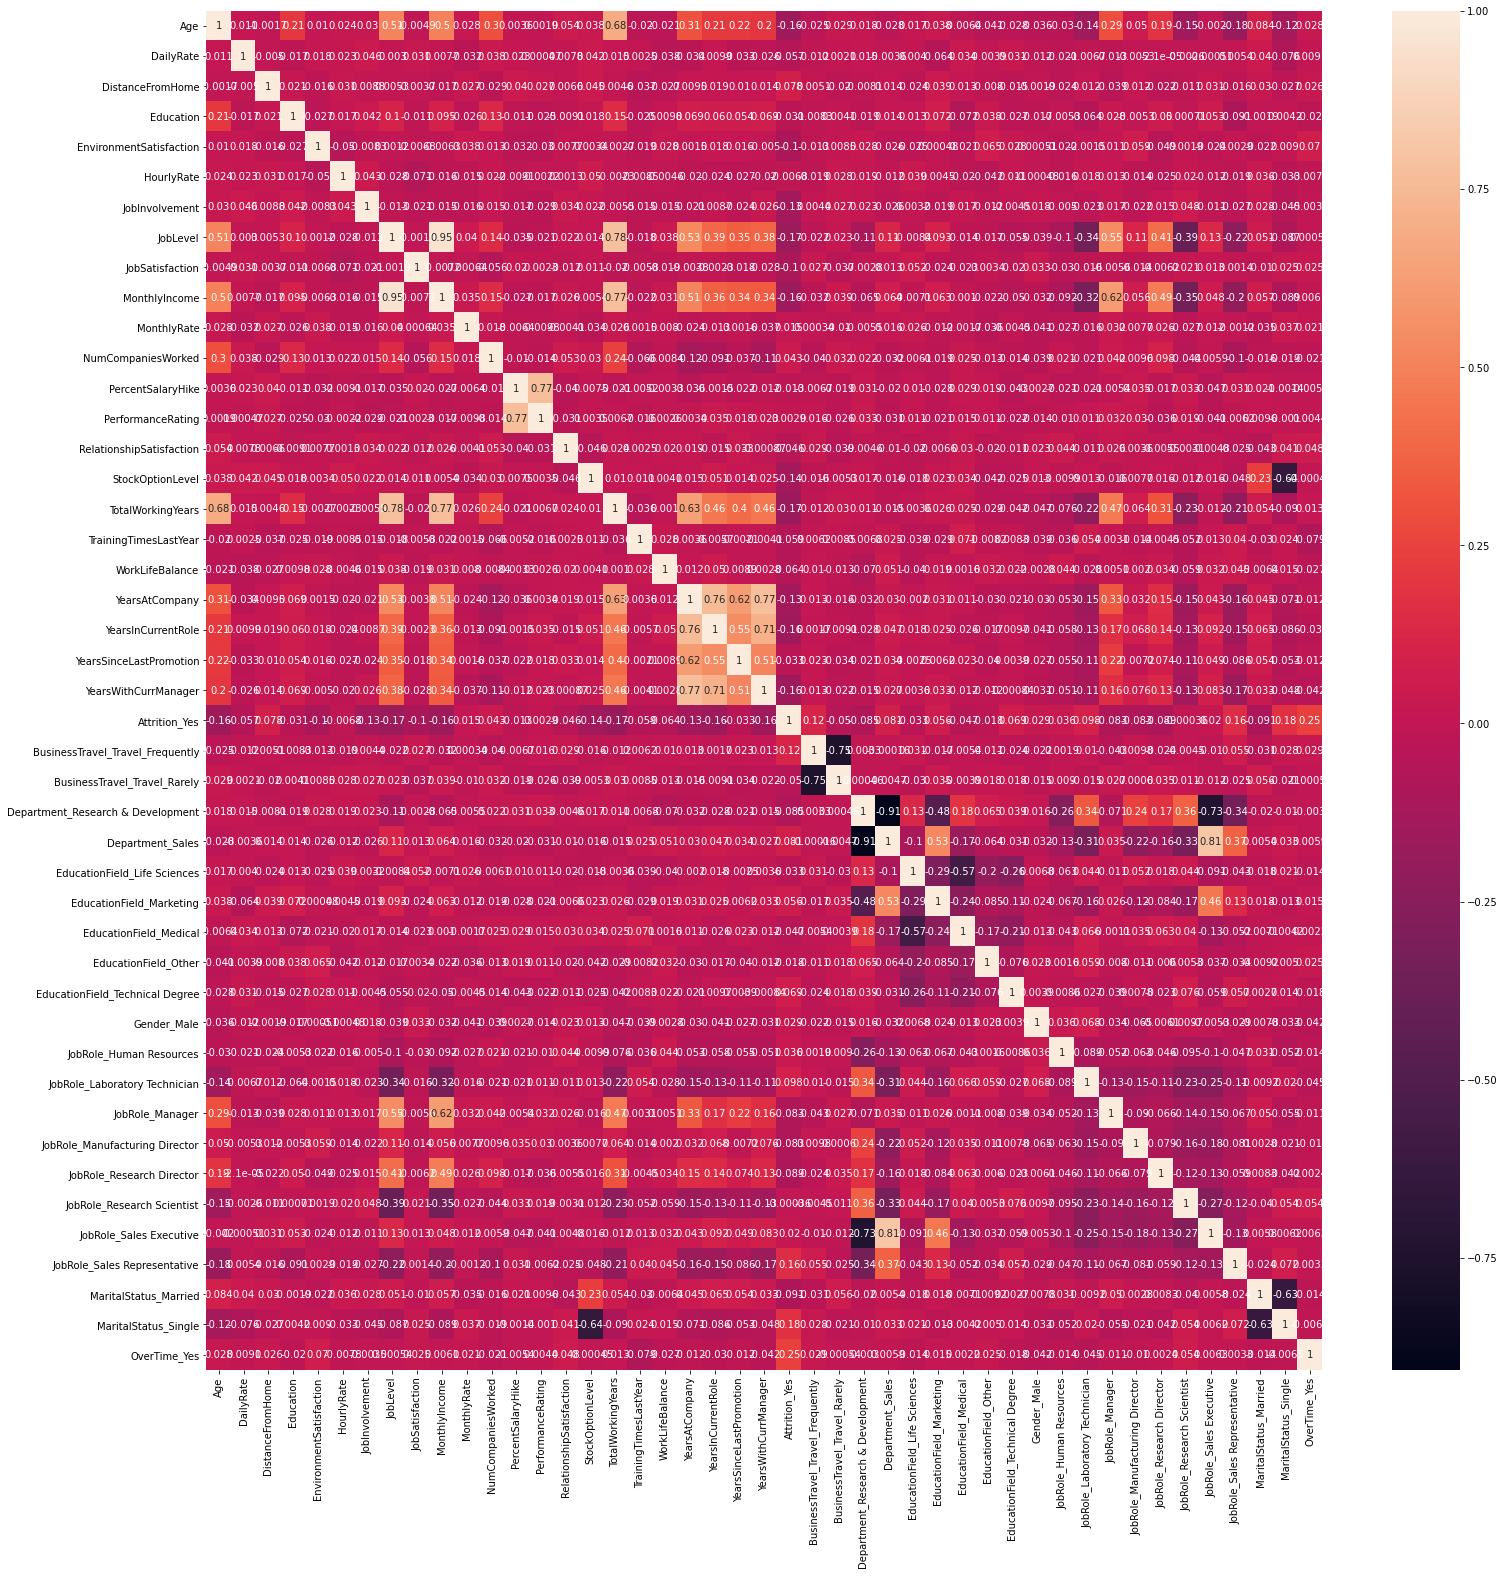

In [31]:
#finding the correlation
plt.figure(figsize=(25,25,))
sns.heatmap(final_data.corr(),annot=True)

# Skewness

In [32]:
final_data.skew()

Age                                  0.413286
DailyRate                           -0.003519
DistanceFromHome                     0.958118
Education                           -0.289681
EnvironmentSatisfaction             -0.321654
HourlyRate                          -0.032311
JobInvolvement                      -0.498419
JobLevel                             1.025401
JobSatisfaction                     -0.329672
MonthlyIncome                        1.369817
MonthlyRate                          0.018578
NumCompaniesWorked                   1.026471
PercentSalaryHike                    0.821128
PerformanceRating                    1.921883
RelationshipSatisfaction            -0.302828
StockOptionLevel                     0.968980
TotalWorkingYears                    1.117172
TrainingTimesLastYear                0.553124
WorkLifeBalance                     -0.552480
YearsAtCompany                       1.764529
YearsInCurrentRole                   0.917363
YearsSinceLastPromotion           

some of the column values are above the threshold value of skewness i.e +/-0.5

# Removing Outliers 

In [33]:
from scipy.stats import zscore
z=np.abs(zscore(final_data))
df_new=final_data[(z<3).all(axis=1)]
df_new

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0
5,32,1005,2,2,4,79,3,1,4,3068,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,39,722,24,1,2,60,2,4,4,12031,...,0,0,0,0,0,1,0,1,0,0
1465,36,884,23,2,3,41,4,2,4,2571,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,4,42,2,3,1,9991,...,0,0,0,0,0,0,0,1,0,0
1468,49,1023,2,3,4,63,2,2,2,5390,...,0,0,0,0,0,1,0,1,0,0


In [34]:
df.shape

(1470, 31)

In [35]:
df_new.shape

(832, 45)

In [36]:
loss_data=(1470-832)/1470*100
print(loss_data,"%")

43.40136054421769 %


# splitting the data into features and Target

In [37]:
x=df_new.drop(['Attrition_Yes'],axis=1)
y=df_new['Attrition_Yes']

# Transforming data to remove skewness

In [38]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.727196  ,  0.75068896, -1.4954131 , ..., -0.90146335,
         1.42318465,  1.57056253],
       [ 1.5048251 , -1.33125118,  0.18719415, ...,  1.10930744,
        -0.70264951, -0.63671454],
       [-0.20881799,  1.37959743, -0.74196776, ...,  1.10930744,
        -0.70264951,  1.57056253],
       ...,
       [ 0.51045028, -0.40867096, -0.1064222 , ...,  1.10930744,
        -0.70264951, -0.63671454],
       [ 1.5048251 ,  0.57305956, -1.05912012, ...,  1.10930744,
        -0.70264951, -0.63671454],
       [-0.08083081, -0.37052025,  0.18719415, ...,  1.10930744,
        -0.70264951, -0.63671454]])

# Scaling the data using standardScaler

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.727196  ,  0.75068896, -1.4954131 , ..., -0.90146335,
         1.42318465,  1.57056253],
       [ 1.5048251 , -1.33125118,  0.18719415, ...,  1.10930744,
        -0.70264951, -0.63671454],
       [-0.20881799,  1.37959743, -0.74196776, ...,  1.10930744,
        -0.70264951,  1.57056253],
       ...,
       [ 0.51045028, -0.40867096, -0.1064222 , ...,  1.10930744,
        -0.70264951, -0.63671454],
       [ 1.5048251 ,  0.57305956, -1.05912012, ...,  1.10930744,
        -0.70264951, -0.63671454],
       [-0.08083081, -0.37052025,  0.18719415, ...,  1.10930744,
        -0.70264951, -0.63671454]])

Here we have scaled all the features into same scale

# Multicolliniarity checking using VIF

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(final_data.values,i) for i in range(final_data.shape[1])]
vif["features"]=final_data.columns

In [41]:
vif

,vif,features
0,35.180993,Age
1,5.092320,DailyRate
2,2.350620,DistanceFromHome
3,9.660153,Education
4,7.387796,EnvironmentSatisfaction
5,11.570575,HourlyRate
6,15.835603,JobInvolvement
7,62.229609,JobLevel
8,7.262360,JobSatisfaction
9,52.696447,MonthlyIncome


In [42]:
#finding the variables based on the cut-off value of VIF 5

In [43]:
f_data=vif[vif.vif>5].reset_index(drop=True)
f_data

,vif,features
0,35.180993,Age
1,5.092320,DailyRate
2,9.660153,Education
3,7.387796,EnvironmentSatisfaction
4,11.570575,HourlyRate
5,15.835603,JobInvolvement
6,62.229609,JobLevel
7,7.262360,JobSatisfaction
8,52.696447,MonthlyIncome
9,5.089499,MonthlyRate


# ModelBuilding

Here our dataset is of Binary Classification so we use LogisticRegression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [45]:
lr=LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At Random state {i} the training accuracy is:",accuracy_score(y_train,pred_train))
    print(f"At Random state {i} the testing accuracy is:",accuracy_score(y_test,pred_test))
    print("\n")

At Random state 0 the training accuracy is: 0.8857142857142857
At Random state 0 the testing accuracy is: 0.8622754491017964


At Random state 1 the training accuracy is: 0.8766917293233083
At Random state 1 the testing accuracy is: 0.9041916167664671


At Random state 2 the training accuracy is: 0.8902255639097745
At Random state 2 the testing accuracy is: 0.8562874251497006


At Random state 3 the training accuracy is: 0.8932330827067669
At Random state 3 the testing accuracy is: 0.8622754491017964


At Random state 4 the training accuracy is: 0.8796992481203008
At Random state 4 the testing accuracy is: 0.8562874251497006


At Random state 5 the training accuracy is: 0.8992481203007519
At Random state 5 the testing accuracy is: 0.8383233532934131


At Random state 6 the training accuracy is: 0.8977443609022556
At Random state 6 the testing accuracy is: 0.8622754491017964


At Random state 7 the training accuracy is: 0.8827067669172932
At Random state 7 the testing accuracy is: 0.892

At Random state 68 the training accuracy is: 0.8917293233082707
At Random state 68 the testing accuracy is: 0.8562874251497006


At Random state 69 the training accuracy is: 0.8842105263157894
At Random state 69 the testing accuracy is: 0.874251497005988


At Random state 70 the training accuracy is: 0.9052631578947369
At Random state 70 the testing accuracy is: 0.8083832335329342


At Random state 71 the training accuracy is: 0.8827067669172932
At Random state 71 the testing accuracy is: 0.844311377245509


At Random state 72 the training accuracy is: 0.8872180451127819
At Random state 72 the testing accuracy is: 0.8682634730538922


At Random state 73 the training accuracy is: 0.8917293233082707
At Random state 73 the testing accuracy is: 0.8862275449101796


At Random state 74 the training accuracy is: 0.8917293233082707
At Random state 74 the testing accuracy is: 0.8562874251497006


At Random state 75 the training accuracy is: 0.8857142857142857
At Random state 75 the testing accu

At Random state 131 the training accuracy is: 0.8872180451127819
At Random state 131 the testing accuracy is: 0.874251497005988


At Random state 132 the training accuracy is: 0.8872180451127819
At Random state 132 the testing accuracy is: 0.8682634730538922


At Random state 133 the training accuracy is: 0.8887218045112782
At Random state 133 the testing accuracy is: 0.8682634730538922


At Random state 134 the training accuracy is: 0.8917293233082707
At Random state 134 the testing accuracy is: 0.8682634730538922


At Random state 135 the training accuracy is: 0.8872180451127819
At Random state 135 the testing accuracy is: 0.8862275449101796


At Random state 136 the training accuracy is: 0.8992481203007519
At Random state 136 the testing accuracy is: 0.844311377245509


At Random state 137 the training accuracy is: 0.8932330827067669
At Random state 137 the testing accuracy is: 0.8143712574850299


At Random state 138 the training accuracy is: 0.8917293233082707
At Random state 138 

At Random state 199 the training accuracy is: 0.8857142857142857
At Random state 199 the testing accuracy is: 0.8862275449101796


At Random state 200 the training accuracy is: 0.8917293233082707
At Random state 200 the testing accuracy is: 0.8622754491017964


At Random state 201 the training accuracy is: 0.9022556390977443
At Random state 201 the testing accuracy is: 0.8143712574850299


At Random state 202 the training accuracy is: 0.8947368421052632
At Random state 202 the testing accuracy is: 0.8263473053892215


At Random state 203 the training accuracy is: 0.8781954887218045
At Random state 203 the testing accuracy is: 0.8622754491017964


At Random state 204 the training accuracy is: 0.8827067669172932
At Random state 204 the testing accuracy is: 0.8682634730538922


At Random state 205 the training accuracy is: 0.8932330827067669
At Random state 205 the testing accuracy is: 0.8802395209580839


At Random state 206 the training accuracy is: 0.8962406015037594
At Random state 20

At Random state 266 the training accuracy is: 0.8842105263157894
At Random state 266 the testing accuracy is: 0.8562874251497006


At Random state 267 the training accuracy is: 0.881203007518797
At Random state 267 the testing accuracy is: 0.8982035928143712


At Random state 268 the training accuracy is: 0.8872180451127819
At Random state 268 the testing accuracy is: 0.8922155688622755


At Random state 269 the training accuracy is: 0.8872180451127819
At Random state 269 the testing accuracy is: 0.8682634730538922


At Random state 270 the training accuracy is: 0.8902255639097745
At Random state 270 the testing accuracy is: 0.8502994011976048


At Random state 271 the training accuracy is: 0.8887218045112782
At Random state 271 the testing accuracy is: 0.8862275449101796


At Random state 272 the training accuracy is: 0.8872180451127819
At Random state 272 the testing accuracy is: 0.8922155688622755


At Random state 273 the training accuracy is: 0.8977443609022556
At Random state 273

At Random state 329 the training accuracy is: 0.8947368421052632
At Random state 329 the testing accuracy is: 0.844311377245509


At Random state 330 the training accuracy is: 0.8902255639097745
At Random state 330 the testing accuracy is: 0.874251497005988


At Random state 331 the training accuracy is: 0.8902255639097745
At Random state 331 the testing accuracy is: 0.844311377245509


At Random state 332 the training accuracy is: 0.8842105263157894
At Random state 332 the testing accuracy is: 0.8862275449101796


At Random state 333 the training accuracy is: 0.8872180451127819
At Random state 333 the testing accuracy is: 0.874251497005988


At Random state 334 the training accuracy is: 0.9022556390977443
At Random state 334 the testing accuracy is: 0.844311377245509


At Random state 335 the training accuracy is: 0.8917293233082707
At Random state 335 the testing accuracy is: 0.8862275449101796


At Random state 336 the training accuracy is: 0.8962406015037594
At Random state 336 the

At Random state 394 the training accuracy is: 0.8872180451127819
At Random state 394 the testing accuracy is: 0.8383233532934131


At Random state 395 the training accuracy is: 0.8887218045112782
At Random state 395 the testing accuracy is: 0.8802395209580839


At Random state 396 the training accuracy is: 0.8857142857142857
At Random state 396 the testing accuracy is: 0.8922155688622755


At Random state 397 the training accuracy is: 0.8872180451127819
At Random state 397 the testing accuracy is: 0.8862275449101796


At Random state 398 the training accuracy is: 0.8902255639097745
At Random state 398 the testing accuracy is: 0.8682634730538922


At Random state 399 the training accuracy is: 0.8796992481203008
At Random state 399 the testing accuracy is: 0.8922155688622755


At Random state 400 the training accuracy is: 0.8962406015037594
At Random state 400 the testing accuracy is: 0.8502994011976048


At Random state 401 the training accuracy is: 0.8902255639097745
At Random state 40

At Random state 460 the training accuracy is: 0.8857142857142857
At Random state 460 the testing accuracy is: 0.8922155688622755


At Random state 461 the training accuracy is: 0.8932330827067669
At Random state 461 the testing accuracy is: 0.8562874251497006


At Random state 462 the training accuracy is: 0.9067669172932331
At Random state 462 the testing accuracy is: 0.8502994011976048


At Random state 463 the training accuracy is: 0.8902255639097745
At Random state 463 the testing accuracy is: 0.8682634730538922


At Random state 464 the training accuracy is: 0.8796992481203008
At Random state 464 the testing accuracy is: 0.8922155688622755


At Random state 465 the training accuracy is: 0.8977443609022556
At Random state 465 the testing accuracy is: 0.8502994011976048


At Random state 466 the training accuracy is: 0.8857142857142857
At Random state 466 the testing accuracy is: 0.8802395209580839


At Random state 467 the training accuracy is: 0.8796992481203008
At Random state 46


At Random state 523 the training accuracy is: 0.8992481203007519
At Random state 523 the testing accuracy is: 0.8323353293413174


At Random state 524 the training accuracy is: 0.8902255639097745
At Random state 524 the testing accuracy is: 0.8862275449101796


At Random state 525 the training accuracy is: 0.8962406015037594
At Random state 525 the testing accuracy is: 0.8802395209580839


At Random state 526 the training accuracy is: 0.8887218045112782
At Random state 526 the testing accuracy is: 0.8622754491017964


At Random state 527 the training accuracy is: 0.8827067669172932
At Random state 527 the testing accuracy is: 0.8562874251497006


At Random state 528 the training accuracy is: 0.8842105263157894
At Random state 528 the testing accuracy is: 0.8323353293413174


At Random state 529 the training accuracy is: 0.8827067669172932
At Random state 529 the testing accuracy is: 0.8802395209580839


At Random state 530 the training accuracy is: 0.8766917293233083
At Random state 5

At Random state 589 the training accuracy is: 0.8842105263157894
At Random state 589 the testing accuracy is: 0.8862275449101796


At Random state 590 the training accuracy is: 0.8947368421052632
At Random state 590 the testing accuracy is: 0.8682634730538922


At Random state 591 the training accuracy is: 0.8857142857142857
At Random state 591 the testing accuracy is: 0.8622754491017964


At Random state 592 the training accuracy is: 0.8977443609022556
At Random state 592 the testing accuracy is: 0.8502994011976048


At Random state 593 the training accuracy is: 0.8932330827067669
At Random state 593 the testing accuracy is: 0.844311377245509


At Random state 594 the training accuracy is: 0.8977443609022556
At Random state 594 the testing accuracy is: 0.8323353293413174


At Random state 595 the training accuracy is: 0.8977443609022556
At Random state 595 the testing accuracy is: 0.8622754491017964


At Random state 596 the training accuracy is: 0.8902255639097745
At Random state 596

At Random state 657 the training accuracy is: 0.8887218045112782
At Random state 657 the testing accuracy is: 0.8682634730538922


At Random state 658 the training accuracy is: 0.8872180451127819
At Random state 658 the testing accuracy is: 0.8682634730538922


At Random state 659 the training accuracy is: 0.8872180451127819
At Random state 659 the testing accuracy is: 0.8862275449101796


At Random state 660 the training accuracy is: 0.8857142857142857
At Random state 660 the testing accuracy is: 0.8862275449101796


At Random state 661 the training accuracy is: 0.8796992481203008
At Random state 661 the testing accuracy is: 0.8622754491017964


At Random state 662 the training accuracy is: 0.8977443609022556
At Random state 662 the testing accuracy is: 0.8622754491017964


At Random state 663 the training accuracy is: 0.8992481203007519
At Random state 663 the testing accuracy is: 0.8502994011976048


At Random state 664 the training accuracy is: 0.8932330827067669
At Random state 66

At Random state 721 the training accuracy is: 0.8887218045112782
At Random state 721 the testing accuracy is: 0.8562874251497006


At Random state 722 the training accuracy is: 0.8917293233082707
At Random state 722 the testing accuracy is: 0.8802395209580839


At Random state 723 the training accuracy is: 0.8857142857142857
At Random state 723 the testing accuracy is: 0.874251497005988


At Random state 724 the training accuracy is: 0.8827067669172932
At Random state 724 the testing accuracy is: 0.8622754491017964


At Random state 725 the training accuracy is: 0.9067669172932331
At Random state 725 the testing accuracy is: 0.8203592814371258


At Random state 726 the training accuracy is: 0.8902255639097745
At Random state 726 the testing accuracy is: 0.8862275449101796


At Random state 727 the training accuracy is: 0.8962406015037594
At Random state 727 the testing accuracy is: 0.8502994011976048


At Random state 728 the training accuracy is: 0.8977443609022556
At Random state 728

At Random state 786 the training accuracy is: 0.881203007518797
At Random state 786 the testing accuracy is: 0.8982035928143712


At Random state 787 the training accuracy is: 0.8902255639097745
At Random state 787 the testing accuracy is: 0.8383233532934131


At Random state 788 the training accuracy is: 0.8902255639097745
At Random state 788 the testing accuracy is: 0.874251497005988


At Random state 789 the training accuracy is: 0.8917293233082707
At Random state 789 the testing accuracy is: 0.8323353293413174


At Random state 790 the training accuracy is: 0.8977443609022556
At Random state 790 the testing accuracy is: 0.8562874251497006


At Random state 791 the training accuracy is: 0.8947368421052632
At Random state 791 the testing accuracy is: 0.8263473053892215


At Random state 792 the training accuracy is: 0.8947368421052632
At Random state 792 the testing accuracy is: 0.8802395209580839


At Random state 793 the training accuracy is: 0.8932330827067669
At Random state 793 

At Random state 849 the training accuracy is: 0.8781954887218045
At Random state 849 the testing accuracy is: 0.8802395209580839


At Random state 850 the training accuracy is: 0.8977443609022556
At Random state 850 the testing accuracy is: 0.8862275449101796


At Random state 851 the training accuracy is: 0.8902255639097745
At Random state 851 the testing accuracy is: 0.8622754491017964


At Random state 852 the training accuracy is: 0.8962406015037594
At Random state 852 the testing accuracy is: 0.8622754491017964


At Random state 853 the training accuracy is: 0.8902255639097745
At Random state 853 the testing accuracy is: 0.8682634730538922


At Random state 854 the training accuracy is: 0.8857142857142857
At Random state 854 the testing accuracy is: 0.9041916167664671


At Random state 855 the training accuracy is: 0.8917293233082707
At Random state 855 the testing accuracy is: 0.8502994011976048


At Random state 856 the training accuracy is: 0.8887218045112782
At Random state 85

At Random state 915 the training accuracy is: 0.8796992481203008
At Random state 915 the testing accuracy is: 0.8862275449101796


At Random state 916 the training accuracy is: 0.881203007518797
At Random state 916 the testing accuracy is: 0.8562874251497006


At Random state 917 the training accuracy is: 0.8962406015037594
At Random state 917 the testing accuracy is: 0.8263473053892215


At Random state 918 the training accuracy is: 0.8857142857142857
At Random state 918 the testing accuracy is: 0.8862275449101796


At Random state 919 the training accuracy is: 0.8842105263157894
At Random state 919 the testing accuracy is: 0.874251497005988


At Random state 920 the training accuracy is: 0.8872180451127819
At Random state 920 the testing accuracy is: 0.8383233532934131


At Random state 921 the training accuracy is: 0.8947368421052632
At Random state 921 the testing accuracy is: 0.8622754491017964


At Random state 922 the training accuracy is: 0.8766917293233083
At Random state 922 

At Random state 978 the training accuracy is: 0.8736842105263158
At Random state 978 the testing accuracy is: 0.8982035928143712


At Random state 979 the training accuracy is: 0.8962406015037594
At Random state 979 the testing accuracy is: 0.8383233532934131


At Random state 980 the training accuracy is: 0.8932330827067669
At Random state 980 the testing accuracy is: 0.8562874251497006


At Random state 981 the training accuracy is: 0.8902255639097745
At Random state 981 the testing accuracy is: 0.8502994011976048


At Random state 982 the training accuracy is: 0.8917293233082707
At Random state 982 the testing accuracy is: 0.8562874251497006


At Random state 983 the training accuracy is: 0.8827067669172932
At Random state 983 the testing accuracy is: 0.844311377245509


At Random state 984 the training accuracy is: 0.8842105263157894
At Random state 984 the testing accuracy is: 0.844311377245509


At Random state 985 the training accuracy is: 0.8947368421052632
At Random state 985 

At random state 135 training and testng accuracy is 0.886

# DecisionTreeClassifier

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy_score is:",accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
print("cross_validation_score is:",cross_val_score(dtc,x,y,cv=5).mean())

Accuracy_score is: 0.8143712574850299
[[125  12]
 [ 19  11]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       137
           1       0.48      0.37      0.42        30

    accuracy                           0.81       167
   macro avg       0.67      0.64      0.65       167
weighted avg       0.80      0.81      0.80       167

cross_validation_score is: 0.769158069403362


# KNN

In [47]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy is",accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))
print("cross_val_score is",cross_val_score(knn,x,y,cv=5).mean())

Accuracy is 0.8263473053892215
[[134   3]
 [ 26   4]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       137
           1       0.57      0.13      0.22        30

    accuracy                           0.83       167
   macro avg       0.70      0.56      0.56       167
weighted avg       0.79      0.83      0.78       167

cross_val_score is 0.8437702907438135


# SVC

In [48]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy_score is:",accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
print("cross_val_score is:",cross_val_score(svc,x,y,cv=5).mean())

Accuracy_score is: 0.844311377245509
[[135   2]
 [ 24   6]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       137
           1       0.75      0.20      0.32        30

    accuracy                           0.84       167
   macro avg       0.80      0.59      0.61       167
weighted avg       0.83      0.84      0.81       167

cross_val_score is: 0.8582136930957363


In [49]:
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy_score is:",accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
print("cross_val_score is:",cross_val_score(svc,x,y,cv=5).mean())

Accuracy_score is: 0.8622754491017964
[[136   1]
 [ 22   8]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       137
           1       0.89      0.27      0.41        30

    accuracy                           0.86       167
   macro avg       0.87      0.63      0.67       167
weighted avg       0.87      0.86      0.83       167

cross_val_score is: 0.8630113267441022


# RandomForestClassifier

In [50]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print("Accuracy is",accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))
print("cross_val_score is",cross_val_score(rfc,x,y,cv=5).mean())

Accuracy is 0.844311377245509
[[137   0]
 [ 26   4]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       137
           1       1.00      0.13      0.24        30

    accuracy                           0.84       167
   macro avg       0.92      0.57      0.57       167
weighted avg       0.87      0.84      0.79       167

cross_val_score is 0.8461727148113412


# GradientBoostingClassifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print("Accuracy is",accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))
print("cross_val_score is",cross_val_score(gbc,x,y,cv=5).mean())

Accuracy is 0.8502994011976048
[[133   4]
 [ 21   9]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       137
           1       0.69      0.30      0.42        30

    accuracy                           0.85       167
   macro avg       0.78      0.64      0.67       167
weighted avg       0.83      0.85      0.83       167

cross_val_score is 0.8558112690282087


# HyperParametr Tuning

# svcGridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV
svmc=SVC(probability=True)
svc_param_grid={'kernel':['poly'],
                'gamma':[0.01,0.1,1],
                'C':[1,50,100,300,1000]
               }
gssvmc=GridSearchCV(svmc,param_grid=svc_param_grid,cv=5)
gssvmc.fit(x_train,y_train)
svmc_best=gssvmc.best_estimator_
gssvmc.best_score_


0.8556390977443609

In [ ]:
gscore=cross_val_score(gssvmc,x,y,cv=5)
gc=gscore.mean()
print('crossvalscore:',gc*100)

# conclusion:we are getting Accuracy 85.56 and cross_val_score as 85.22 so,we accept this model

# saving the model

In [54]:
import pickle
filename="HR_Attrition_Prediction.pkl"
pickle.dump(gssvmc,open(filename,'wb'))